<a href="https://colab.research.google.com/github/imstaHub/hanghae99/blob/master/week1_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week1 Advanced Homework

## [MY CODE] import packeges and function

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
def accuracy(model, dataloader, use_cuda=False):
    cnt = 0
    acc = 0

    for data in dataloader:
        inputs, labels = data
        if(use_cuda):
            inputs, labels = inputs.to('cuda'), labels.to('cuda')

        preds = model(inputs)
        preds = torch.argmax(preds, dim=-1)

        cnt += labels.shape[0]
        acc += (labels == preds).sum().item()

    return acc / cnt


import numpy as np

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
    x = np.arange(len(train_accs))

    plt.plot(x, train_accs, label=label1)
    plt.plot(x, test_accs, label=label2)
    plt.legend()
    plt.show()


## [MY CODE] CIFAR10 데이터 로드

In [ ]:
transform = transforms.ToTensor()

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=False,
    transform=transform
)

100%|██████████| 170M/170M [00:05<00:00, 30.6MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
print('class 수:', len(trainset.classes))
print(trainset.classes)

class 수: 10
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


## [MY CODE] CIFAR10 shape 확인

50000
torch.Size([3, 32, 32]) 6


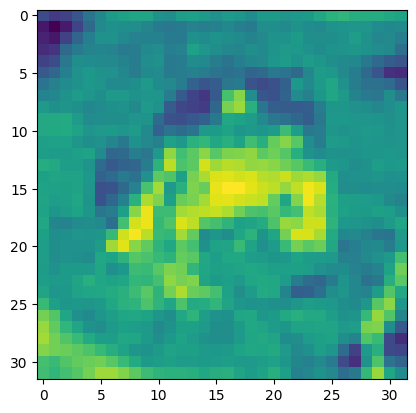

In [ ]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0])

## [LOG] Shape은 (3,32,32)이며 해당 그림은 클래스 6에 해당한다

## [MY CODE] loader 설정, batch size = 256

In [ ]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

## [MY CODE] 학습 모델 작성
## activation function 변경, ReLU -> LeakyReLU

In [ ]:
from torch import nn
from torch.optim import SGD, Adam

class Model(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, n_dim)
        self.layer4 = nn.Linear(n_dim, 10)

        self.act = nn.LeakyReLU()


    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.act(self.layer3(x))
        x = self.layer4(x)

        return x



## [MY CODE] 학습 진행
- epoch = 50
- label에 one-hot 적용

In [ ]:
import torch.nn.functional as F

### model1, optimizer Adam
model1 = Model(32 * 32 * 3, 1024)
model1 = model1.to('cuda')

lr = 0.001
optimizer_adam = Adam(model1.parameters(), lr=lr)

n_epochs = 50

adam_accuracy_list = []

for epoch in range(n_epochs):
    total_loss = 0.
    for data in trainloader:
        model1.zero_grad()
        inputs, labels = data
        one_hot_labels = F.one_hot(labels, num_classes=10).type(torch.DoubleTensor)
        inputs, one_hot_labels = inputs.to('cuda'), one_hot_labels.to('cuda')

        preds = model1(inputs)
        loss = nn.CrossEntropyLoss()(preds, one_hot_labels)
        loss.backward()
        optimizer_adam.step()

        total_loss += loss.item()

    train_accuracy = accuracy(model1, trainloader, True)
    print(f"Epoch {epoch:3d} | Loss: {total_loss} | Acc: {train_accuracy}")

    adam_accuracy_list.append(train_accuracy)


Epoch   0 | Loss: 371.1622769706664 | Acc: 0.36448
Epoch   1 | Loss: 328.5985540336813 | Acc: 0.41654
Epoch   2 | Loss: 309.33288291748596 | Acc: 0.45312
Epoch   3 | Loss: 295.87329585927944 | Acc: 0.46452
Epoch   4 | Loss: 285.42006240571163 | Acc: 0.49964
Epoch   5 | Loss: 278.6853891154664 | Acc: 0.49568
Epoch   6 | Loss: 268.8492962140153 | Acc: 0.53342
Epoch   7 | Loss: 262.78432557674887 | Acc: 0.51504
Epoch   8 | Loss: 256.62969190133344 | Acc: 0.54882
Epoch   9 | Loss: 248.88606897686785 | Acc: 0.54528
Epoch  10 | Loss: 241.89777985360885 | Acc: 0.57882
Epoch  11 | Loss: 232.45829389861882 | Acc: 0.59592
Epoch  12 | Loss: 227.65360252745398 | Acc: 0.6027
Epoch  13 | Loss: 219.0996316415761 | Acc: 0.64016
Epoch  14 | Loss: 210.0928687826707 | Acc: 0.64036
Epoch  15 | Loss: 200.96628355961164 | Acc: 0.67034
Epoch  16 | Loss: 192.1985586871789 | Acc: 0.68902
Epoch  17 | Loss: 180.76643620502443 | Acc: 0.67956
Epoch  18 | Loss: 171.93639715088904 | Acc: 0.72954
Epoch  19 | Loss: 16

In [ ]:
import torch.nn.functional as F

### model2, optimizer SGD
model2 = Model(32 * 32 * 3, 1024)
model2 = model2.to('cuda')

lr = 0.001
optimizer_sgd = SGD(model2.parameters(), lr=lr)

n_epochs = 50

sgd_accuracy_list = []

for epoch in range(n_epochs):
    total_loss = 0.
    for data in trainloader:
        model2.zero_grad()
        inputs, labels = data
        one_hot_labels = F.one_hot(labels, num_classes=10).type(torch.DoubleTensor)
        inputs, one_hot_labels = inputs.to('cuda'), one_hot_labels.to('cuda')

        preds = model2(inputs)
        loss = nn.CrossEntropyLoss()(preds, one_hot_labels)
        loss.backward()
        optimizer_sgd.step()

        total_loss += loss.item()

    train_accuracy = accuracy(model2, trainloader, True)
    print(f"Epoch {epoch:3d} | Loss: {total_loss} | Acc: {train_accuracy}")

    sgd_accuracy_list.append(train_accuracy)


Epoch   0 | Loss: 451.22177319247277 | Acc: 0.1208
Epoch   1 | Loss: 450.74174766447396 | Acc: 0.11458
Epoch   2 | Loss: 450.2915555052459 | Acc: 0.11206
Epoch   3 | Loss: 449.8597486566752 | Acc: 0.11324
Epoch   4 | Loss: 449.42748132180424 | Acc: 0.11638
Epoch   5 | Loss: 448.98468142766507 | Acc: 0.1212
Epoch   6 | Loss: 448.5218201544136 | Acc: 0.12604
Epoch   7 | Loss: 448.02681367583574 | Acc: 0.13262
Epoch   8 | Loss: 447.47525259871037 | Acc: 0.1404
Epoch   9 | Loss: 446.8864431831986 | Acc: 0.14916
Epoch  10 | Loss: 446.24545611962674 | Acc: 0.1594
Epoch  11 | Loss: 445.5238945644349 | Acc: 0.16708
Epoch  12 | Loss: 444.7451365694404 | Acc: 0.174
Epoch  13 | Loss: 443.87081288760527 | Acc: 0.18044
Epoch  14 | Loss: 442.91057412317025 | Acc: 0.18748
Epoch  15 | Loss: 441.8032759636641 | Acc: 0.19238
Epoch  16 | Loss: 440.5923665710725 | Acc: 0.19768
Epoch  17 | Loss: 439.22845868580043 | Acc: 0.20142
Epoch  18 | Loss: 437.70167963691057 | Acc: 0.20434
Epoch  19 | Loss: 435.9917

## [LOG] 학습 결과

## [MY CODE] 모델 정확도 비교 Adam VS SGD

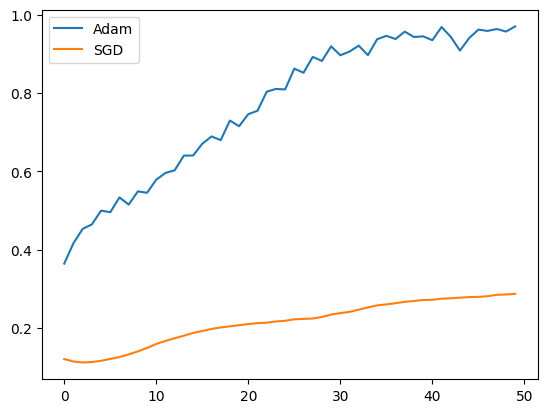

In [ ]:
plot_acc(adam_accuracy_list, sgd_accuracy_list, 'Adam', 'SGD')

## [LOG] Adam으로 최적화한게 학습이 더 잘 되었음, SGD의 경우 학습이 될수록 정확도가 향상되고 있으나 많은 추가 학습이 필요해보임

## [MY CODE] Sigmoid 학습 모델 작성

In [ ]:
from torch import nn
from torch.optim import SGD, Adam

class Model_SIG(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, n_dim)
        self.layer4 = nn.Linear(n_dim, 10)

        self.act = nn.Sigmoid()


    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.act(self.layer1(x))
        x = self.act(self.layer2(x))
        x = self.act(self.layer3(x))
        x = self.layer4(x)

        return x



## [MY CODE] 학습 진형

- epoch 50
- label에 one-hot 적용

In [ ]:
import torch.nn.functional as F

### model3, optimizer Adam, activation Sigmoid
model3 = Model_SIG(32 * 32 * 3, 1024)
model3 = model3.to('cuda')

lr = 0.001
optimizer_adam = Adam(model3.parameters(), lr=lr)

n_epochs = 50

sigmoid_accuracy_list = []

for epoch in range(n_epochs):
    total_loss = 0.
    for data in trainloader:
        model3.zero_grad()
        inputs, labels = data
        one_hot_labels = F.one_hot(labels, num_classes=10).type(torch.DoubleTensor)
        inputs, one_hot_labels = inputs.to('cuda'), one_hot_labels.to('cuda')

        preds = model3(inputs)
        loss = nn.CrossEntropyLoss()(preds, one_hot_labels)
        loss.backward()
        optimizer_adam.step()

        total_loss += loss.item()

    train_accuracy = accuracy(model3, trainloader, True)
    print(f"Epoch {epoch:3d} | Loss: {total_loss} | Acc: {train_accuracy}")

    sigmoid_accuracy_list.append(train_accuracy)


Epoch   0 | Loss: 414.8022557153134 | Acc: 0.26964
Epoch   1 | Loss: 361.7522945048753 | Acc: 0.3418
Epoch   2 | Loss: 339.35166841213356 | Acc: 0.39732
Epoch   3 | Loss: 324.8334211379988 | Acc: 0.42044
Epoch   4 | Loss: 313.8818230442877 | Acc: 0.40206
Epoch   5 | Loss: 305.29080727537365 | Acc: 0.44426
Epoch   6 | Loss: 296.06269200667884 | Acc: 0.46812
Epoch   7 | Loss: 291.6955502173652 | Acc: 0.49012
Epoch   8 | Loss: 284.45502107435533 | Acc: 0.4671
Epoch   9 | Loss: 277.922403278499 | Acc: 0.4891
Epoch  10 | Loss: 273.1654259273506 | Acc: 0.50106
Epoch  11 | Loss: 268.4862069812636 | Acc: 0.52122
Epoch  12 | Loss: 265.74720521295546 | Acc: 0.51832
Epoch  13 | Loss: 261.02225922125183 | Acc: 0.53046
Epoch  14 | Loss: 255.50235936902808 | Acc: 0.53768
Epoch  15 | Loss: 254.29858470643694 | Acc: 0.54544
Epoch  16 | Loss: 248.26359800862446 | Acc: 0.56348
Epoch  17 | Loss: 244.28922406021914 | Acc: 0.57012
Epoch  18 | Loss: 242.540407799866 | Acc: 0.56148
Epoch  19 | Loss: 236.5442

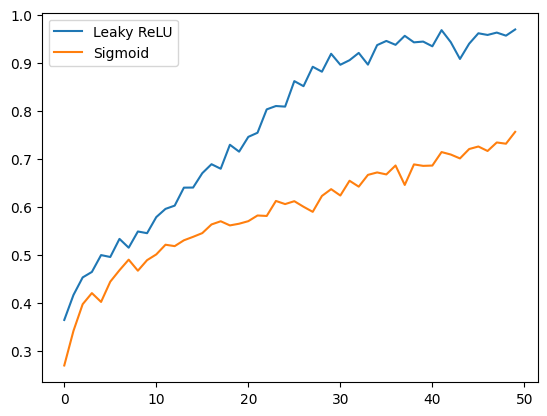

In [ ]:
plot_acc(adam_accuracy_list, sigmoid_accuracy_list, 'Leaky ReLU', 'Sigmoid')

## [LOG] 학습이 많이 튀지만 빠르게 두 모델 모두 학습이 잘 되는 모습을 보여줌. 학습력은 Sigmoid보다 Leaky ReLU가 더 우월함

## [MY CODE] Drop out 적용, 0.1

In [ ]:
from torch import nn
from torch.optim import SGD, Adam

class Model_DO(nn.Module):
    def __init__(self, input_dim, n_dim):
        super().__init__()

        self.layer1 = nn.Linear(input_dim, n_dim)
        self.layer2 = nn.Linear(n_dim, n_dim)
        self.layer3 = nn.Linear(n_dim, n_dim)
        self.layer4 = nn.Linear(n_dim, 10)

        self.act = nn.LeakyReLU()

        self.dropout = nn.Dropout(p=0.1)


    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        x = self.dropout(self.act(self.layer1(x)))
        x = self.dropout(self.act(self.layer2(x)))
        x = self.dropout(self.act(self.layer3(x)))
        x = self.dropout(self.layer4(x))

        return x


## [MY CODE] Accuracy 함수에 model.eval 추가

In [ ]:
def accuracy_no_grad(model, dataloader, use_cuda=False):
    cnt = 0
    acc = 0

    with torch.no_grad():
        model.eval()
        for data in dataloader:
            inputs, labels = data
            if(use_cuda):
                inputs, labels = inputs.to('cuda'), labels.to('cuda')

            preds = model(inputs)
            preds = torch.argmax(preds, dim=-1)

            cnt += labels.shape[0]
            acc += (labels == preds).sum().item()

    return acc / cnt

In [ ]:
import torch.nn.functional as F

### model4, dropout
model4 = Model_DO(32 * 32 * 3, 1024)
model4 = model4.to('cuda')

lr = 0.001
optimizer_adam = Adam(model4.parameters(), lr=lr)

n_epochs = 50

train_accuracy_list = []
test_accuracy_list = []

for epoch in range(n_epochs):
    total_loss = 0.
    model4.train()
    for data in trainloader:
        model4.zero_grad()
        inputs, labels = data
        one_hot_labels = F.one_hot(labels, num_classes=10).type(torch.DoubleTensor)
        inputs, one_hot_labels = inputs.to('cuda'), one_hot_labels.to('cuda')

        preds = model4(inputs)
        loss = nn.CrossEntropyLoss()(preds, one_hot_labels)
        loss.backward()
        optimizer_adam.step()

        total_loss += loss.item()

    train_accuracy = accuracy_no_grad(model4, trainloader, True)
    test_accuracy = accuracy_no_grad(model4, testloader, True)
    print(f"Epoch {epoch:3d} | Loss: {total_loss} | Acc: {train_accuracy}")

    train_accuracy_list.append(train_accuracy)
    test_accuracy_list.append(test_accuracy)


Epoch   0 | Loss: 380.2832498968128 | Acc: 0.36136
Epoch   1 | Loss: 347.4849285069946 | Acc: 0.39504
Epoch   2 | Loss: 332.11216130139763 | Acc: 0.42234
Epoch   3 | Loss: 322.460478483133 | Acc: 0.46352
Epoch   4 | Loss: 314.1465720403312 | Acc: 0.45682
Epoch   5 | Loss: 308.9921793083957 | Acc: 0.47596
Epoch   6 | Loss: 302.97392526745625 | Acc: 0.49208
Epoch   7 | Loss: 298.7805351855904 | Acc: 0.50228
Epoch   8 | Loss: 293.3567242817643 | Acc: 0.5056
Epoch   9 | Loss: 288.6158585333432 | Acc: 0.53046
Epoch  10 | Loss: 284.0258559076505 | Acc: 0.53432
Epoch  11 | Loss: 279.20652430158054 | Acc: 0.5094
Epoch  12 | Loss: 278.12701581087055 | Acc: 0.55402
Epoch  13 | Loss: 273.1741559607661 | Acc: 0.5564
Epoch  14 | Loss: 270.09984598574795 | Acc: 0.55402
Epoch  15 | Loss: 265.45927832742353 | Acc: 0.58194
Epoch  16 | Loss: 264.4929874962873 | Acc: 0.58078
Epoch  17 | Loss: 260.1359430234211 | Acc: 0.5768
Epoch  18 | Loss: 255.98062392798525 | Acc: 0.60192
Epoch  19 | Loss: 252.1600651

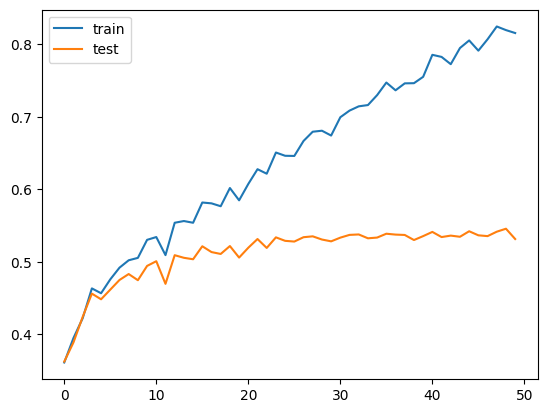

In [ ]:
plot_acc(train_accuracy_list, test_accuracy_list)

## [LOG] testset의 정확도가 떨어지는 것으로 보아, train에 overfitting 된 것 같음